### Unsupervised Learning 
##### By: Lance Dominic C. Raquel

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn.cluster as cluster

#### Part I – Importing the Dataset

##### 1.) Import the data from the file Mall_Customers.csv using pandas.

In [2]:
data = pd.read_csv("Mall_Customers-1.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##### 2.) Using the attribute .rename, rename the columns Annual Income (k)and Spending Score (1-100) to Income and Spending Score, respectively.


In [3]:
data.rename(columns = {'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace = True)
data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##### 3.) Give the summary of statistics of the data using .describe() attribute.

In [4]:
summary_stats = data.describe()
print(summary_stats)

       CustomerID         Age  Annual Income  Spending Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000


##### 4.) Provide a pairplot between Age, Income, and Spending Score using sns.pairplot Python code (See Link 2).

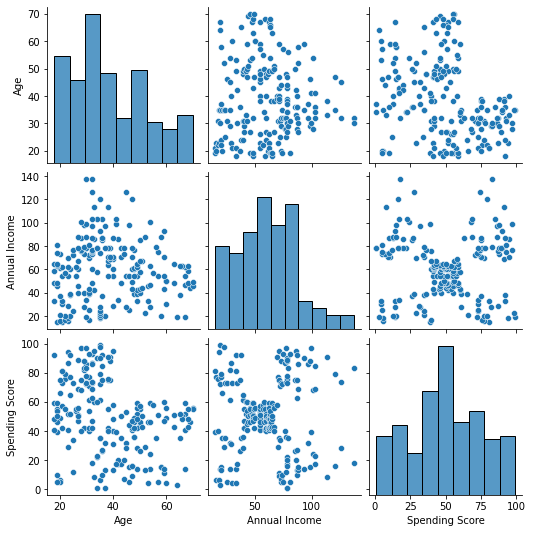

In [5]:
sns.pairplot(data[['Age', 'Annual Income', 'Spending Score']])
plt.show()

#### Part II - Perform K-mean Cluster to Spending Score vs. Income plot with 5 clusters

##### 1. From the Spending score vs. Income plot in part 1, we can see that the data can be clustered in to five. The data can be clustered using the Python code cluster.Kmeans and attribute .fit (See Link 1)

In [6]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(data[['Annual Income', 'Spending Score']])

KMeans(n_clusters=5)

##### 2. Print the cluster centers using the attribute .cluster_centers_


In [7]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


#### Part III - Attach Cluster to the Original Data

##### 1. Add another column to the original data for the cluster label of each training sample. The cluster label can be obtained using the attribute .labels_ of sklearn.cluster.

In [8]:
data['Cluster'] = kmeans.labels_
data

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


##### 2. Print the number of counts of each cluster in the data set using the pandas attribute.value_counts() (see Link 3).

In [9]:
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

1    81
0    39
2    35
3    23
4    22
Name: Cluster, dtype: int64


#### Part IV - Plot Cluster on Chart
##### Use sns.scatterplot to show the clustered plot of Spending Score vs. Income graph (see Link 4) where the value of the cluster column determines the color of the plot.


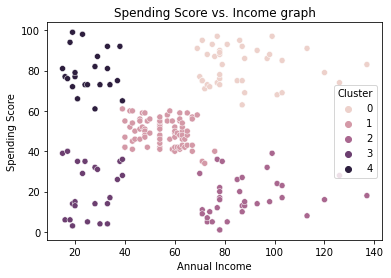

In [10]:
sns.scatterplot(data = data, x='Annual Income',y ='Spending Score',hue ='Cluster')
plt.title('Spending Score vs. Income graph')
plt.show()